In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender',"Card Type"],drop_first=True)

In [12]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [13]:
X_train.shape

(8000, 17)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [15]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=17))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 54        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


(17X3+3)+(3X1+1)=58

In [18]:
# compile we need to defined the optimization function and activation function

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [20]:
history=model.fit(X_train_scaled,y_train,epochs=17, validation_split=0.2)

Epoch 1/17
200/200 [==============================] - 2s 4ms/step - loss: 0.4942 - accuracy: 0.7970 - val_loss: 0.4537 - val_accuracy: 0.7975
Epoch 2/17
200/200 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.7970 - val_loss: 0.3844 - val_accuracy: 0.7975
Epoch 3/17
200/200 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.7970 - val_loss: 0.3262 - val_accuracy: 0.7975
Epoch 4/17
200/200 [==============================] - 1s 3ms/step - loss: 0.2995 - accuracy: 0.7970 - val_loss: 0.2759 - val_accuracy: 0.7987
Epoch 5/17
200/200 [==============================] - 1s 3ms/step - loss: 0.2530 - accuracy: 0.8089 - val_loss: 0.2328 - val_accuracy: 0.8306
Epoch 6/17
200/200 [==============================] - 1s 3ms/step - loss: 0.2136 - accuracy: 0.8783 - val_loss: 0.1967 - val_accuracy: 0.9169
Epoch 7/17
200/200 [==============================] - 1s 3ms/step - loss: 0.1808 - accuracy: 0.9523 - val_loss: 0.1668 - val_accuracy: 0.9731
Epoch 

In [21]:
model.layers[0].get_weights()
# this are 33 weight and 3 layers of first layer

[array([[ 2.29958482e-02,  1.46349026e-02,  1.09666102e-02],
        [-3.15190107e-01, -1.92818880e-01, -2.54775941e-01],
        [ 1.69982016e-02,  2.13640537e-02,  9.36449505e-03],
        [-1.10826232e-01, -2.55625099e-02, -2.13916358e-02],
        [-2.74503324e-03,  1.54809412e-02,  3.89052592e-02],
        [ 2.08022837e-02,  1.40799386e-02,  2.33777221e-02],
        [ 2.20480084e-01,  1.68308675e-01,  2.01504692e-01],
        [ 2.70076096e-03, -1.88061618e-03, -1.73253734e-02],
        [-2.06962872e+00, -2.67882586e+00, -1.77119994e+00],
        [ 3.36702578e-02,  2.53834166e-02,  2.11471487e-02],
        [ 2.10115109e-02,  2.49349531e-02,  3.17947417e-02],
        [-3.80303785e-02, -1.06569640e-01, -1.61117822e-01],
        [ 1.71572585e-02, -2.17962936e-02, -3.28911655e-02],
        [ 6.11991398e-02,  5.12749776e-02,  1.04539506e-01],
        [-3.77251231e-03,  1.93680208e-02,  3.40416208e-02],
        [ 7.81463645e-03,  2.57067140e-02,  3.93156968e-02],
        [-2.09533181e-02

In [22]:
model.layers[1].get_weights() 
# second layers

[array([[-2.8544102],
        [-2.2286162],
        [-2.6578171]], dtype=float32),
 array([1.9057431], dtype=float32)]

In [23]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [24]:
y_pred=np.where(y_log>0.05,1,0)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.998

In [26]:
import matplotlib.pyplot as plt 

In [27]:
history.history

{'loss': [0.49415522813796997,
  0.4177519679069519,
  0.3535976707935333,
  0.29949042201042175,
  0.25300437211990356,
  0.21359898149967194,
  0.18076615035533905,
  0.1535794734954834,
  0.13127392530441284,
  0.11291313916444778,
  0.09779905527830124,
  0.08530905842781067,
  0.07489683479070663,
  0.0661592036485672,
  0.05876675248146057,
  0.052483752369880676,
  0.04711896553635597],
 'accuracy': [0.7970312237739563,
  0.7970312237739563,
  0.7970312237739563,
  0.7970312237739563,
  0.8089062571525574,
  0.8782812356948853,
  0.952343761920929,
  0.9864062666893005,
  0.9962499737739563,
  0.9982812404632568,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142],
 'val_loss': [0.45371147990226746,
  0.38442856073379517,
  0.3262065052986145,
  0.27589598298072815,
  0.23275047540664673,
  0.19667120277881622,
  0.1667517125606537,
  0.1420373022556305,
  0.12163808941841125,
 

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'loss': [0.49415522813796997,
  0.4177519679069519,
  0.3535976707935333,
  0.29949042201042175,
  0.25300437211990356,
  0.21359898149967194,
  0.18076615035533905,
  0.1535794734954834,
  0.13127392530441284,
  0.11291313916444778,
  0.09779905527830124,
  0.08530905842781067,
  0.07489683479070663,
  0.0661592036485672,
  0.05876675248146057,
  0.052483752369880676,
  0.04711896553635597],
 'accuracy': [0.7970312237739563,
  0.7970312237739563,
  0.7970312237739563,
  0.7970312237739563,
  0.8089062571525574,
  0.8782812356948853,
  0.952343761920929,
  0.9864062666893005,
  0.9962499737739563,
  0.9982812404632568,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142],
 'val_loss': [0.45371147990226746,
  0.38442856073379517,
  0.3262065052986145,
  0.27589598298072815,
  0.23275047540664673,
  0.19667120277881622,
  0.1667517125606537,
  0.1420373022556305,
  0.12163808941841125,
 

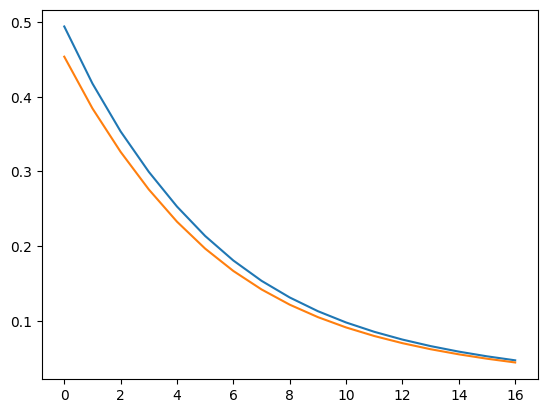

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

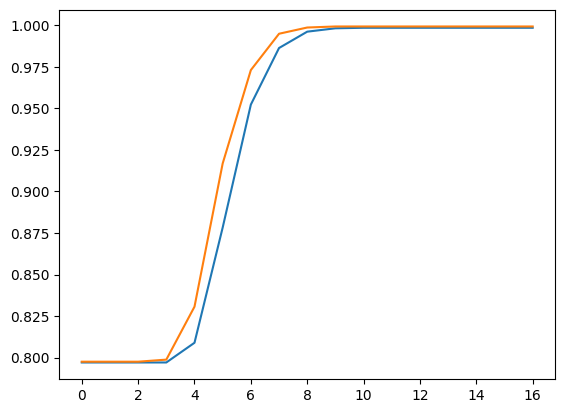

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])